In [55]:
import pandas as pd
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/FRQ/Results/FRQ_backpatch_outputs.csv")
df

,ID,Entity,Category,Group,Original_output,Original_top_token,Mis_Knowledge_Key,src_start,dst_start,num_layers,New_Answer,TopDecodedTokenID,TopDecodedToken
0,1,Taylor Swift,Career_error,VisCont_TxtParam,\nNovelist.,Nov,mis_knowledge1,4,0,1,Singer-songwriter,50,S
1,1,Taylor Swift,Career_error,VisTxtCont,\nChef.,Chef,mis_knowledge2,4,0,1,Singer-songwriter,50,S
2,2,Elon Musk,Career_error,VisTxtCont,\nProfessional athlete.,Professional,mis_knowledge1,4,0,1,Professional athlete.,57513,Professional
3,2,Elon Musk,Career_error,VisTxtParam,\nEntrepreneur,Entre,mis_knowledge2,4,0,1,Entrepreneur,70588,Entre
4,3,Cristiano Ronaldo,Career_error,VisParam_TxtCont,\nProfessional soccer player.,Professional,mis_knowledge1,4,0,1,Professional soccer player.,57513,Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,147,Shia LaBeouf,Career_error,VisParam_TxtCont,\nActor.,Actor,mis_knowledge2,4,0,1,Actor.,18870,Actor
269,148,Chadwick Boseman,Career_error,VisTxtParam,\nActor.,Actor,mis_knowledge1,4,0,1,Actor.,18870,Actor
270,148,Chadwick Boseman,Career_error,VisTxtParam,\nActor.,Actor,mis_knowledge2,4,0,1,Actor.,18870,Actor
271,149,Lupita Nyong'o,Career_error,VisParam_TxtCont,\nActress.,Act,mis_knowledge1,4,0,1,Actress.,2414,Act


In [56]:
#df = df[df['Category'] == 'Career_error']
df["different"] = df["Original_top_token"] != df["TopDecodedToken"]
print(df['Group'].value_counts())
print("1 diff for VisParam_TxtCont")
print("2 diff for VisTxtParam (and one example is actually originally cont)")
print("13(.5) for vistext cont")
print("3 fpr viscont_textparam")
print("16/60 contextual switched = 0.267")
print("3/223 param switched = 0.013")
print("With dest = 1, source = 10, and n = 6")
df.groupby("Group")["different"].mean()

Group
VisTxtParam         110
VisParam_TxtCont    103
VisTxtCont           55
VisCont_TxtParam      5
Name: count, dtype: int64
1 diff for VisParam_TxtCont
2 diff for VisTxtParam (and one example is actually originally cont)
13(.5) for vistext cont
3 fpr viscont_textparam
16/60 contextual switched = 0.267
3/223 param switched = 0.013
With dest = 1, source = 10, and n = 6


Group
VisCont_TxtParam    0.600000
VisParam_TxtCont    0.077670
VisTxtCont          0.272727
VisTxtParam         0.063636
Name: different, dtype: float64

In [57]:
df[df['different']]

,ID,Entity,Category,Group,Original_output,Original_top_token,Mis_Knowledge_Key,src_start,dst_start,num_layers,New_Answer,TopDecodedTokenID,TopDecodedToken,different
0,1,Taylor Swift,Career_error,VisCont_TxtParam,\nNovelist.,Nov,mis_knowledge1,4,0,1,Singer-songwriter,50,S,True
1,1,Taylor Swift,Career_error,VisTxtCont,\nChef.,Chef,mis_knowledge2,4,0,1,Singer-songwriter,50,S,True
17,9,Tom Hanks,Career_error,VisTxtParam,\nFilmmaker.,Fil,mis_knowledge2,4,0,1,"Actor, director.",18870,Actor,True
32,17,Ariana Grande,Career_error,VisTxtCont,\nChef and actress.,Chef,mis_knowledge1,4,0,1,Actress and singer.,2414,Act,True
53,27,Daniel Radcliffe,Career_error,VisTxtCont,\nSoftware engineer.,Software,mis_knowledge2,4,0,1,"Actor, software engineer.",18870,Actor,True
56,29,Zendaya,Career_error,VisParam_TxtCont,"\nSinger, actress, producer.",S,mis_knowledge1,4,0,1,Actress,2414,Act,True
64,33,Gal Gadot,Career_error,VisParam_TxtCont,\nModel and actress.,Model,mis_knowledge1,4,0,1,Actress,2414,Act,True
77,39,Priyanka Chopra,Career_error,VisTxtParam,\nActress,Act,mis_knowledge2,4,0,1,Actor,18870,Actor,True
79,40,Nicki Minaj,Career_error,VisTxtParam,\nRapper,R,mis_knowledge2,4,0,1,Singer,50,S,True
81,41,Cardi B,Career_error,VisTxtCont,\nSoftware engineer.,Software,mis_knowledge2,4,0,1,Rapper,49,R,True


In [58]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Load once (pick a small, fast model)
_sem_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def _clean_text(x):
    if pd.isna(x):
        return ""
    s = str(x).strip()
    # common cleanup for your outputs
    s = s.replace("\n", " ").strip()
    return s

def semantic_checker(df: pd.DataFrame,
                     col_a="Original_output",
                     col_b="New_Answer",
                     *,
                     sim_threshold: float = 0.65,
                     return_score: bool = False):
    """
    Adds df['semantic_diff'].
      - If return_score=False: semantic_diff is True when NOT close (meaning differs).
      - If return_score=True: semantic_diff is the cosine similarity score in [0,1] (higher = closer).
    """
    a = df[col_a].apply(_clean_text).tolist()
    b = df[col_b].apply(_clean_text).tolist()

    # Embed in one batch each (fast + consistent)
    emb_a = _sem_model.encode(a, convert_to_tensor=True, normalize_embeddings=True)
    emb_b = _sem_model.encode(b, convert_to_tensor=True, normalize_embeddings=True)

    # Pairwise cosine similarity (row i with row i)
    sims = util.cos_sim(emb_a, emb_b).diagonal().cpu().numpy()

    if return_score:
        df["semantic_diff"] = sims
    else:
        df["semantic_diff"] = sims < sim_threshold  # True => semantically different

    return df

# ---- usage ----
# df = pd.read_csv(...)
df = semantic_checker(df, sim_threshold=0.65)  # semantic_diff is boolean
# df = semantic_checker(df, sim_threshold=0.65, return_score=True)  # semantic_diff is similarity score
print(df['Group'].value_counts())
df.groupby("Group")["semantic_diff"].sum()


Group
VisTxtParam         110
VisParam_TxtCont    103
VisTxtCont           55
VisCont_TxtParam      5
Name: count, dtype: int64


Group
VisCont_TxtParam     3
VisParam_TxtCont     2
VisTxtCont          13
VisTxtParam          2
Name: semantic_diff, dtype: int64

In [59]:
df[(df["Group"] == "VisParam_TxtCont") & (df['semantic_diff'])]

,ID,Entity,Category,Group,Original_output,Original_top_token,Mis_Knowledge_Key,src_start,dst_start,num_layers,New_Answer,TopDecodedTokenID,TopDecodedToken,different,semantic_diff
56,29,Zendaya,Career_error,VisParam_TxtCont,"\nSinger, actress, producer.",S,mis_knowledge1,4,0,1,Actress,2414,Act,True,True
267,147,Shia LaBeouf,Career_error,VisParam_TxtCont,\nActor.,Actor,mis_knowledge1,4,0,1,"Chef, filmmaker, artist.",93903,Chef,True,True


Group
VisTxtParam         110
VisParam_TxtCont    103
VisTxtCont           55
VisCont_TxtParam      5
Name: count, dtype: int64
1 diff for VisParam_TxtCont
2 diff for VisTxtParam (and one example is actually originally cont)
13(.5) for vistext cont
3 fpr viscont_textparam
16/60 contextual switched = 0.267
3/223 param switched = 0.013
With dest = 0, source = 4, and n = 1


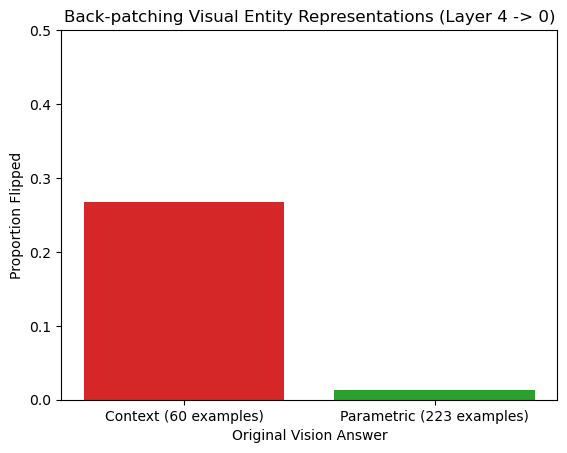

In [60]:
import matplotlib.pyplot as plt
df = df[df['Category'] == 'Career_error']
df["different"] = df["Original_top_token"] != df["TopDecodedToken"]
print(df['Group'].value_counts())
print("1 diff for VisParam_TxtCont")
print("2 diff for VisTxtParam (and one example is actually originally cont)")
print("13(.5) for vistext cont")
print("3 fpr viscont_textparam")
print("16/60 contextual switched = 0.267")
print("3/223 param switched = 0.013")
print("With dest = 0, source = 4, and n = 1")

labels = ["Context (60 examples)", "Parametric (223 examples)"]
values = [0.267, 0.013]

colors = ['#d62728', '#2ca02c']

plt.bar(labels, values, color=colors)

plt.xlabel("Original Vision Answer")
plt.ylabel("Proportion Flipped")
plt.ylim(None, 0.5)
plt.title("Back-patching Visual Entity Representations (Layer 4 -> 0)")


plt.show()


# Back patch the no conflict to make parametric switch to context

In [61]:
import pandas as pd
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/FRQ/Results/FRQ_backpatch_outputs_clean.csv")
df

,ID,Entity,Category,Group,Original_output,Original_top_token,Mis_Knowledge_Key,src_start,dst_start,num_layers,New_Answer,TopDecodedTokenID,TopDecodedToken
0,1,Taylor Swift,Temporal_error,VisTxtCont,\n1988,1,mis_knowledge1,10,0,6,1988,16,1
1,1,Taylor Swift,Temporal_error,VisTxtCont,\n1990,1,mis_knowledge2,10,0,6,1990,16,1
2,1,Taylor Swift,location_error,VisTxtCont,\nCanadian.,Canadian,mis_knowledge1,10,0,6,Canadian,59574,Canadian
3,1,Taylor Swift,location_error,VisTxtParam,\nAmerican.,American,mis_knowledge2,10,0,6,American,28418,American
4,1,Taylor Swift,Career_error,VisCont_TxtParam,\nNovelist.,Nov,mis_knowledge1,10,0,6,Novelist.,18944,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,148,Chadwick Boseman,Career_error,VisTxtParam,\nActor.,Actor,mis_knowledge2,10,0,6,Software engineer.,19250,Software
545,149,Lupita Nyong'o,location_error,VisTxtCont,\nUgandan-Mexican,U,mis_knowledge1,10,0,6,Ugandan-Mexican,52,U
546,149,Lupita Nyong'o,location_error,VisTxtCont,\nKenyan-Guatemalan,Ken,mis_knowledge2,10,0,6,Kenyan-Guatemalan,47241,Ken
547,149,Lupita Nyong'o,Career_error,VisParam_TxtCont,\nActress.,Act,mis_knowledge1,10,0,6,Actress,2414,Act


In [62]:
df = df[df['Category'] == 'Career_error']
df["different"] = df["Original_top_token"] != df["TopDecodedToken"]
print(df['Group'].value_counts())
# print("1 diff for VisParam_TxtCont")
# print("2 diff for VisTxtParam (and one example is actually originally cont)")
# print("13(.5) for vistext cont")
# print("3 fpr viscont_textparam")
# print("16/60 contextual switched = 0.267")
# print("3/223 param switched = 0.013")
# print("With dest = 1, source = 10, and n = 6")
df.groupby("Group")["different"].mean()

Group
VisTxtParam         110
VisParam_TxtCont    103
VisTxtCont           55
VisCont_TxtParam      5
Name: count, dtype: int64


/tmp/ipykernel_2419400/982067562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["different"] = df["Original_top_token"] != df["TopDecodedToken"]


Group
VisCont_TxtParam    0.400000
VisParam_TxtCont    0.563107
VisTxtCont          0.145455
VisTxtParam         0.236364
Name: different, dtype: float64

In [63]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util


_sem_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def _clean_text(x):
    if pd.isna(x):
        return ""
    s = str(x).strip()
    # common cleanup for your outputs
    s = s.replace("\n", " ").strip()
    return s

def semantic_checker(df: pd.DataFrame,
                     col_a="Original_output",
                     col_b="New_Answer",
                     *,
                     sim_threshold: float = 0.65,
                     return_score: bool = False):

    a = df[col_a].apply(_clean_text).tolist()
    b = df[col_b].apply(_clean_text).tolist()

    emb_a = _sem_model.encode(a, convert_to_tensor=True, normalize_embeddings=True)
    emb_b = _sem_model.encode(b, convert_to_tensor=True, normalize_embeddings=True)

    sims = util.cos_sim(emb_a, emb_b).diagonal().cpu().numpy()

    if return_score:
        df["semantic_diff"] = sims
    else:
        df["semantic_diff"] = sims < sim_threshold  

    return df


df = semantic_checker(df, sim_threshold=0.65)  


/tmp/ipykernel_2419400/1693455467.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["semantic_diff"] = sims < sim_threshold  # True => semantically different


In [64]:
print(df['Group'].value_counts())
df.groupby("Group")["semantic_diff"].sum()

Group
VisTxtParam         110
VisParam_TxtCont    103
VisTxtCont           55
VisCont_TxtParam      5
Name: count, dtype: int64


Group
VisCont_TxtParam     1
VisParam_TxtCont    54
VisTxtCont           4
VisTxtParam         23
Name: semantic_diff, dtype: int64

Group
VisTxtParam         110
VisParam_TxtCont    103
VisTxtCont           55
VisCont_TxtParam      5
Name: count, dtype: int64
1 diff for VisParam_TxtCont
2 diff for VisTxtParam (and one example is actually originally cont)
13(.5) for vistext cont
3 fpr viscont_textparam
2/60 contextual switched = 0.267
77/223 param switched = 0.013
With dest = 0, source = 4, and n = 1


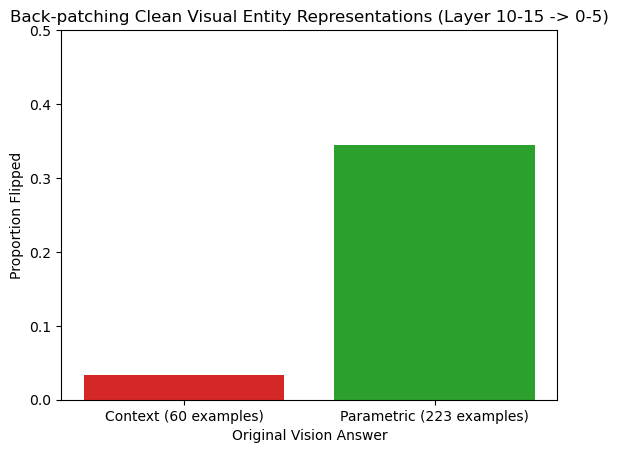

In [67]:
import matplotlib.pyplot as plt
df = df[df['Category'] == 'Career_error']
df["different"] = df["Original_top_token"] != df["TopDecodedToken"]
print(df['Group'].value_counts())
print("1 diff for VisParam_TxtCont")
print("2 diff for VisTxtParam (and one example is actually originally cont)")
print("13(.5) for vistext cont")
print("3 fpr viscont_textparam")
print("2/60 contextual switched = 0.267")
print("77/223 param switched = 0.013")
print("With dest = 0, source = 4, and n = 1")

labels = ["Context (60 examples)", "Parametric (223 examples)"]
values = [0.033, 0.345]

colors = ['#d62728', '#2ca02c']

plt.bar(labels, values, color=colors)

plt.xlabel("Original Vision Answer")
plt.ylabel("Proportion Flipped")
plt.ylim(None, 0.5)
plt.title("Back-patching Clean Visual Entity Representations (Layer 10-15 -> 0-5)")


plt.show()


In [65]:
df[(df['Group'] == 'VisTxtCont') & (df['semantic_diff'])]

,ID,Entity,Category,Group,Original_output,Original_top_token,Mis_Knowledge_Key,src_start,dst_start,num_layers,New_Answer,TopDecodedTokenID,TopDecodedToken,different,semantic_diff
106,26,Emma Watson,Career_error,VisTxtCont,\nNovelist and activist.,Nov,mis_knowledge1,10,0,6,Model/Actress,1712,Model,True,True
239,64,Donald Trump,Career_error,VisTxtCont,\nPresident,President,mis_knowledge2,10,0,6,Businessman,22727,Business,True,True
242,65,Justin Trudeau,Career_error,VisTxtCont,\nPresident of Canada,President,mis_knowledge1,10,0,6,Politician,96347,Polit,True,True
409,109,Christopher Nolan,Career_error,VisTxtCont,\nNovelist.,Nov,mis_knowledge1,10,0,6,Actor/Writer/Director,18870,Actor,True,True
